In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import category_encoders as ce  # Leave-one-out, CatBoost, Heimert coding
from sklearn.preprocessing import StandardScaler  # label encoder, 標準化
from sklearn.cluster import DBSCAN  # outlier detection
from sklearn.model_selection import train_test_split, GridSearchCV  # split data into train data & test data

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10

In [37]:
d = pd.read_csv('Claim.csv')
d

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


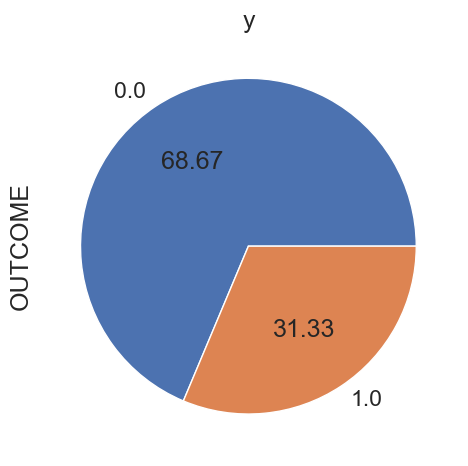

In [38]:
sns.set(font_scale=1.5)
fig, axs = plt.subplots(figsize=(10, 5))
autopct = '%.2f'
d['OUTCOME'].value_counts().plot.pie(autopct=autopct, ax=axs)
axs.set_title('y')
fig.tight_layout()

In [39]:
#基本不更動raw_data, 之後都用df操作

In [40]:
raw_data = pd.read_csv('Claim.csv').drop(['ID'], axis=1)
raw_data

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [41]:
var_of_category = ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'VEHICLE_TYPE']

<div style="background-color:#D9D9D9;"><font size="5"> -嚴重的<b> data imbalanced-</b></font></div>約1:15

In [42]:
raw_data.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [43]:
percentage_result = raw_data.isnull().sum()/raw_data.shape[0]
percentage_result = pd.DataFrame({"missing": percentage_result}) #"columns": percentage_result.keys(), 
percentage_result.sort_values(by='missing', ascending=False).head()

,missing
CREDIT_SCORE,0.0982
ANNUAL_MILEAGE,0.0957
AGE,0.0000
CHILDREN,0.0000
PAST_ACCIDENTS,0.0000


category encoding，採用target encoding中的catboost<br>
https://zhuanlan.zhihu.com/p/560004588<br>
https://zhuanlan.zhihu.com/p/40231966

In [44]:
import category_encoders as ce
df = raw_data
cbe_encoder = ce.cat_boost.CatBoostEncoder()
train_cbe = cbe_encoder.fit_transform(df[var_of_category], df['OUTCOME'])
for idx in var_of_category:
    df[idx] = train_cbe[idx].values
df

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0.313300,0.313300,0.313300,0.313300,0.313300,0.313300,0.629027,1.0,0.313300,0.0,1.0,10238,12000.0,0.313300,0,0,0,0.0
1,0.313300,0.313300,0.156650,0.156650,0.313300,0.313300,0.357757,0.0,0.313300,0.0,0.0,10238,16000.0,0.156650,0,0,0,1.0
2,0.656650,0.156650,0.437767,0.437767,0.156650,0.313300,0.493146,1.0,0.656650,0.0,0.0,10238,11000.0,0.437767,0,0,0,0.0
3,0.437767,0.656650,0.328325,0.328325,0.313300,0.156650,0.206013,1.0,0.437767,0.0,1.0,32765,11000.0,0.328325,0,0,0,0.0
4,0.313300,0.437767,0.262660,0.313300,0.656650,0.104433,0.388366,1.0,0.328325,0.0,0.0,32765,12000.0,0.262660,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.337141,0.263693,0.312091,0.238494,0.225640,0.133605,0.582787,1.0,0.403405,0.0,0.0,10238,16000.0,0.312776,0,0,1,0.0
9996,0.337030,0.263641,0.312056,0.238421,0.471951,0.277170,0.522231,1.0,0.106599,0.0,1.0,32765,NaN,0.312743,1,0,0,0.0
9997,0.336920,0.363189,0.312021,0.628312,0.323223,0.277041,0.470940,1.0,0.403347,0.0,1.0,10238,14000.0,0.312710,0,0,0,0.0
9998,0.336810,0.263588,0.311987,0.238349,0.323145,0.653425,0.364185,0.0,0.403289,0.0,1.0,10238,13000.0,0.312677,2,0,1,1.0


In [45]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=4)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
df

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0.313300,0.313300,0.313300,0.313300,0.313300,0.313300,0.629027,1.0,0.313300,0.0,1.0,10238.0,12000.0,0.313300,0.0,0.0,0.0,0.0
1,0.313300,0.313300,0.156650,0.156650,0.313300,0.313300,0.357757,0.0,0.313300,0.0,0.0,10238.0,16000.0,0.156650,0.0,0.0,0.0,1.0
2,0.656650,0.156650,0.437767,0.437767,0.156650,0.313300,0.493146,1.0,0.656650,0.0,0.0,10238.0,11000.0,0.437767,0.0,0.0,0.0,0.0
3,0.437767,0.656650,0.328325,0.328325,0.313300,0.156650,0.206013,1.0,0.437767,0.0,1.0,32765.0,11000.0,0.328325,0.0,0.0,0.0,0.0
4,0.313300,0.437767,0.262660,0.313300,0.656650,0.104433,0.388366,1.0,0.328325,0.0,0.0,32765.0,12000.0,0.262660,2.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.337141,0.263693,0.312091,0.238494,0.225640,0.133605,0.582787,1.0,0.403405,0.0,0.0,10238.0,16000.0,0.312776,0.0,0.0,1.0,0.0
9996,0.337030,0.263641,0.312056,0.238421,0.471951,0.277170,0.522231,1.0,0.106599,0.0,1.0,32765.0,9750.0,0.312743,1.0,0.0,0.0,0.0
9997,0.336920,0.363189,0.312021,0.628312,0.323223,0.277041,0.470940,1.0,0.403347,0.0,1.0,10238.0,14000.0,0.312710,0.0,0.0,0.0,0.0
9998,0.336810,0.263588,0.311987,0.238349,0.323145,0.653425,0.364185,0.0,0.403289,0.0,1.0,10238.0,13000.0,0.312677,2.0,0.0,1.0,1.0


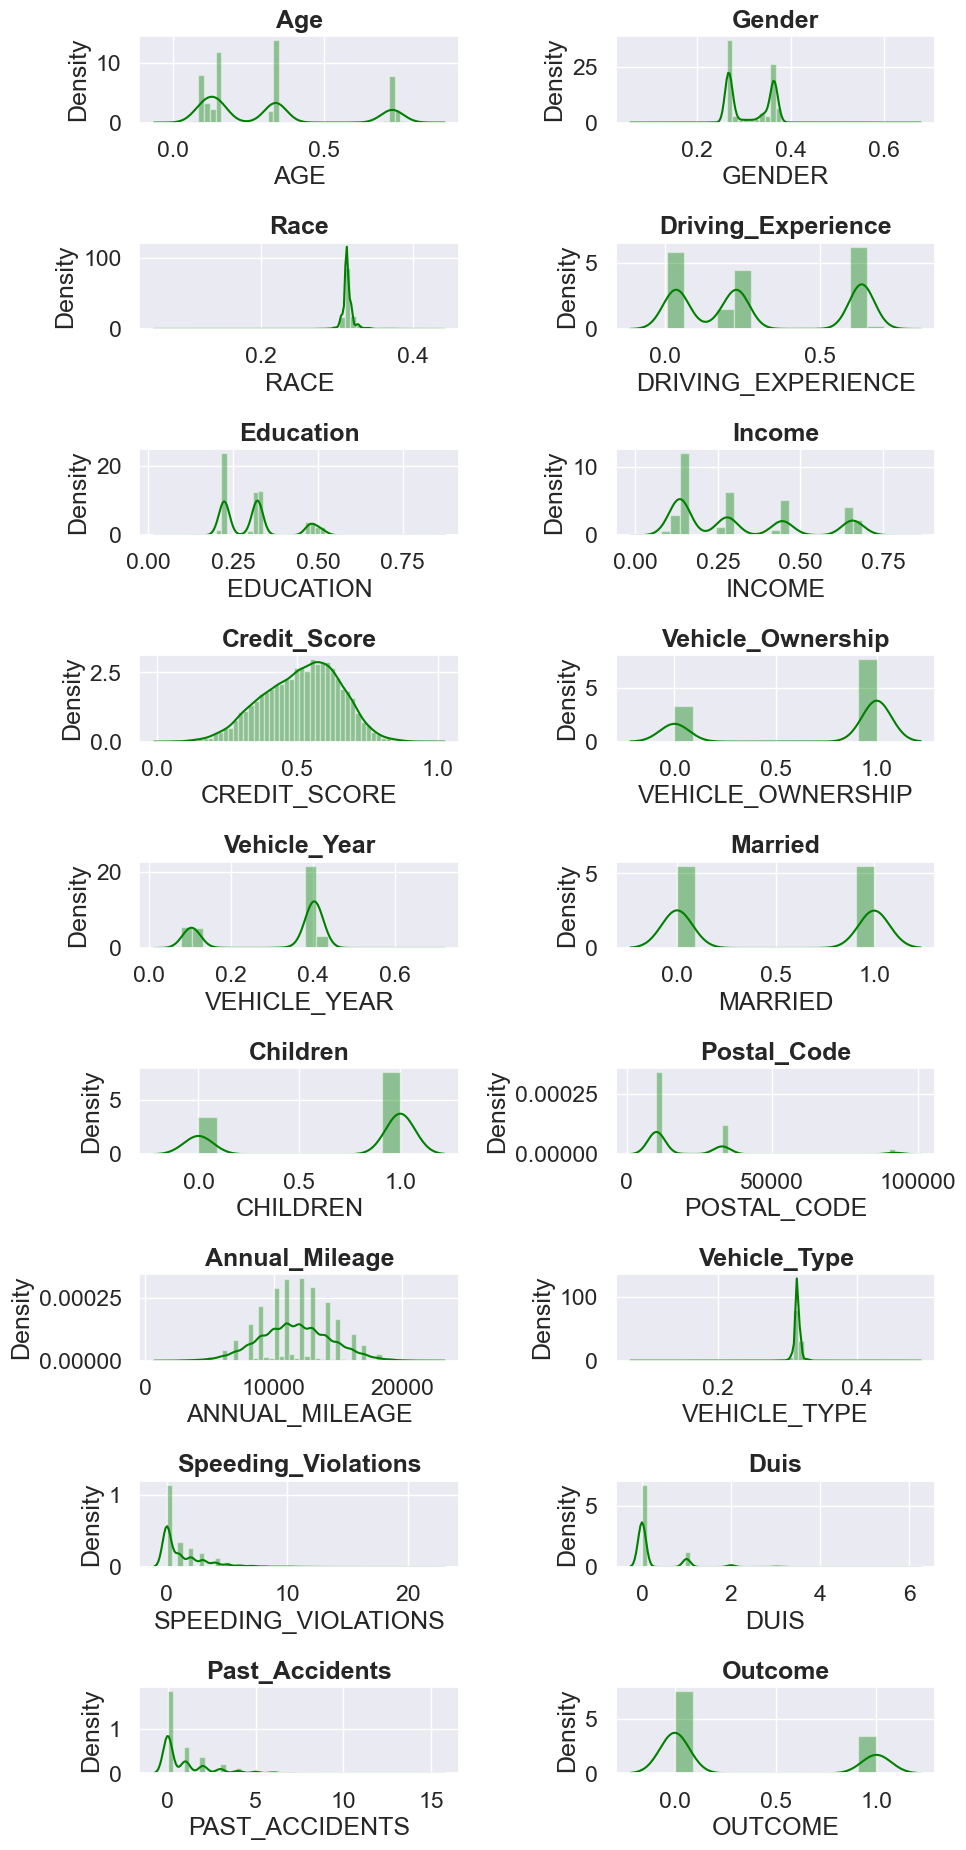

In [46]:
target = [i for i in df.columns]
plt.figure(figsize=(10,45))
for n,column in enumerate(target):
    plot=plt.subplot(22,2,n+1)
    sns.distplot(df[column],color='green')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()

<b>RadViz</b> 是一種多元數據可視化算法，它將每個特徵維度均勻地繪制在圓周上，然後在圓的內部繪制點，使點在從中心到每個弧的軸上的值歸一化。這種機制允許有多少維度就有多少維度，可以很容易地適應一個圓，大大擴展了可視化的維度。
可以使用這種方法來檢測類之間的可分離性。如
- 是否有機會從特徵集中學習，
- 檢查是否有太多的噪音

上圖看起來標籤的分類沒有很明確，故不期待結果準確區分is_claim，本身是具有偏大難度<br>

之後嘗試接著處理資料不平衡<br><br>
為了避免受到噪音干擾，同時採用`ENN`(Edited Nearest Neighbor)和`Borderline Smote`進行採樣<br>
- ENN可以改為Tomek Link Removal，Borderline Smote可以改為單純Smote<br>
- 也可以試著採用集成方法Ensemble(BalanceCascade)
- http://www.17bigdata.com/聊聊样本采样技术/
----
採樣前得先對數據標準化，標準化之前先分好訓練集&測試集

In [48]:
X = df.iloc[:, :-1]
y = df['OUTCOME']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train = pd.DataFrame(standard_scaler.fit_transform(X_train), columns=X_train.columns) #先fit
X_test = pd.DataFrame(standard_scaler.transform(X_test), columns=X_test.columns) #再transform
X_train

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,-0.924044,-1.066367,-0.233246,-1.138878,0.087149,-0.900274,0.219098,0.661480,-1.526241,0.997004,0.677143,-0.511636,-1.335406,-0.130468,1.111686,-0.433018,2.940435
1,0.069008,0.704061,-0.669936,1.285899,1.793799,1.767215,-1.151423,-1.511761,0.564189,0.997004,0.677143,-0.511636,-0.972718,-0.517924,-0.661338,-0.433018,-0.642457
2,0.070896,-0.977978,-1.880052,1.255789,-0.897356,-0.221616,0.147588,0.661480,0.549875,0.997004,-1.476792,-0.511636,0.115346,-0.697216,-0.661338,-0.433018,-0.642457
3,-0.691115,-1.008799,-0.041609,-0.283032,0.062556,-0.867563,0.720348,0.661480,-1.507686,0.997004,-1.476792,0.685773,-0.972718,0.025767,0.668430,-0.433018,-0.642457
4,-0.691580,1.035805,-0.083561,1.268646,-0.903305,-0.171144,-0.312180,0.661480,0.644004,-1.003005,-1.476792,0.685773,0.478034,-0.039890,-0.661338,-0.433018,-0.642457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.924882,1.097259,-0.129993,-1.148506,0.097496,-0.874525,1.323543,0.661480,0.662910,0.997004,0.677143,-0.511636,0.840722,0.023362,0.668430,1.346202,1.148989
7996,1.780714,1.128556,-0.172320,1.290412,-0.945007,0.665540,0.043916,0.661480,-1.541378,-1.003005,-1.476792,-0.511636,-0.247342,0.143387,-0.661338,-0.433018,-0.642457
7997,-0.924288,-1.067538,-0.179116,-1.144416,-0.950017,-0.882410,0.820893,0.661480,-1.543458,0.997004,0.677143,-0.511636,-0.156670,-0.001979,-0.661338,-0.433018,0.551840
7998,-0.848624,0.545443,-1.340030,-1.083527,-1.126567,-1.039065,1.678670,0.661480,-1.632595,0.997004,0.677143,-0.511636,-1.335406,-0.436923,-0.218082,-0.433018,2.343286


#### Base line performance

對於主要目標 標籤為1的預測
Precision：0.6395534290271132,             Recall：0.6334913112164297,
        Accuracy：0.771,        AUC：0.7340828904289903,        f1-score：0.6365079365079365
[[1141  226]
 [ 232  401]]
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83      1367
         1.0       0.64      0.63      0.64       633

    accuracy                           0.77      2000
   macro avg       0.74      0.73      0.73      2000
weighted avg       0.77      0.77      0.77      2000



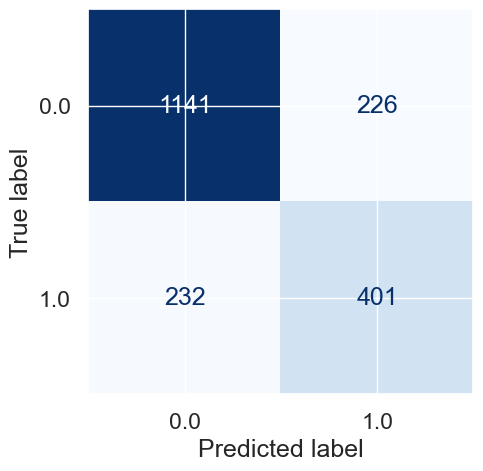

The TP rate is: 0.83
The TN rate is: 0.63
The FN rate is: 0.17
The FP rate is: 0.37


In [53]:
model = DecisionTreeClassifier(splitter='random')
fit_result(model, X_train, y_train, X_test, y_test)

In [54]:
from collections import Counter
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

### CrossCV測試樣本比例
#### *****之後記得把kind_sel的模式改看看，也可以試試一般的ENN*****
https://blog.csdn.net/mathlxj/article/details/89645321
(mode只刪了626筆，另一個能刪除一萬多)

In [118]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


model = DecisionTreeClassifier(splitter='random')
print("before data balancing：",Counter(y_train))
print()

for i in np.linspace(0.2, 1, 9):
    for j in range(3, 9, 2):   
        renn = RepeatedEditedNearestNeighbours()#kind_sel='mode'
        BDsmote = BorderlineSMOTE(m_neighbors=j, sampling_strategy=i)
        steps = [('under(renn)', renn), ('over(BDsmote)', BDsmote)]
        pipeline = Pipeline(steps=steps)
        X_cv, y_cv = pipeline.fit_resample(X_train, y_train)

        #重複兩次 5-fold來評分
        cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
        scores = cross_val_score(model, X_cv, y_cv, scoring='f1_macro', cv=cv) #n_jobs為一次運行多少processor
        print(f'ratio={i}, m={j}, Mean f1_macro: %.3f' % np.mean(scores))
    print("after data balancing:",Counter(y_cv))
    print()
    #print("after data balancing:",Counter(y_cv))

before data balancing： Counter({0: 43881, 1: 2992})

ratio=0.2, m=3, Mean f1_macro: 0.732
ratio=0.2, m=5, Mean f1_macro: 0.727
ratio=0.2, m=7, Mean f1_macro: 0.723
after data balancing: Counter({0: 32783, 1: 6556})

ratio=0.30000000000000004, m=3, Mean f1_macro: 0.787
ratio=0.30000000000000004, m=5, Mean f1_macro: 0.787
ratio=0.30000000000000004, m=7, Mean f1_macro: 0.785
after data balancing: Counter({0: 32783, 1: 9834})

ratio=0.4, m=3, Mean f1_macro: 0.820
ratio=0.4, m=5, Mean f1_macro: 0.819
ratio=0.4, m=7, Mean f1_macro: 0.814
after data balancing: Counter({0: 32783, 1: 13113})

ratio=0.5, m=3, Mean f1_macro: 0.847
ratio=0.5, m=5, Mean f1_macro: 0.839
ratio=0.5, m=7, Mean f1_macro: 0.840
after data balancing: Counter({0: 32783, 1: 16391})

ratio=0.6000000000000001, m=3, Mean f1_macro: 0.861
ratio=0.6000000000000001, m=5, Mean f1_macro: 0.852
ratio=0.6000000000000001, m=7, Mean f1_macro: 0.851
after data balancing: Counter({0: 32783, 1: 19669})

ratio=0.7, m=3, Mean f1_macro: 0.866

發現在樣本數為1:1，BorderlineSMOTE m=3的情況下會得到較好的f1_macro值<br>
<b>注意:</b> 此結果是基於兩label的資料分布有改變後的結果，才會有此好的結果在f1_macro

In [52]:
def fit_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predicted_y = model.predict(X_test)
    true_y = y_test
    
    print("對於主要目標 標籤為1的預測")
    print(f"Precision：{metrics.precision_score(true_y, predicted_y)}, \
            Recall：{metrics.recall_score(true_y, predicted_y)},\n \
       Accuracy：{metrics.accuracy_score(true_y, predicted_y)}, \
       AUC：{metrics.roc_auc_score(true_y, model.predict_proba(X_test)[:,1])}, \
       f1-score：{metrics.f1_score(true_y, predicted_y)}")
    cm = confusion_matrix(true_y, predicted_y)
    print(cm) 
    print(metrics.classification_report(true_y, predicted_y))
    
    #此處-1是先的label容易搞混，但我們就照平常的方法來不管此例是-1還是1
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_confusion_matrix(model, X_test, y_test,  cmap=plt.cm.Blues, colorbar=False, ax=ax)
    plt.show()
    
    #已驗算過
    print('The TP rate is: {0:4.2}'.format(float(cm[0][0])/np.sum(cm[0])))
    print('The TN rate is: {0:4.2}'.format(float(cm[1][1])/np.sum(cm[1])))
    print('The FN rate is: {0:4.2}'.format(1- float(cm[0][0])/np.sum(cm[0]))) #FN = 1-TP
    print('The FP rate is: {0:4.2}'.format(1- float(cm[1][1])/np.sum(cm[1]))) #FP = 1-TN

正式將訓練資料重新取樣 -> X_train_sm, y_train_sm, X_test, y_test<br>
再看一次結果分佈，發現預測為`1`的比例提高了，但是是以數量換得的recall

In [55]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
renn = EditedNearestNeighbours()#kind_sel='mode'
BDsmote = BorderlineSMOTE(m_neighbors=3, sampling_strategy=1.0)
steps = [('under(renn)', renn), ('over(BDsmote)', BDsmote)]
pipeline = Pipeline(steps=steps)
X_train_sm, y_train_sm = pipeline.fit_resample(X_train, y_train)

#model = DecisionTreeClassifier(splitter='random')
#fit_result(model, X_train_sm, y_train_sm, X_test, y_test)

對於主要目標 標籤為1的預測
Precision：0.6160919540229886,             Recall：0.8467614533965245,
        Accuracy：0.7845,        AUC：0.8012154011679039,        f1-score：0.7132401862940785
[[1033  334]
 [  97  536]]
              precision    recall  f1-score   support

         0.0       0.91      0.76      0.83      1367
         1.0       0.62      0.85      0.71       633

    accuracy                           0.78      2000
   macro avg       0.77      0.80      0.77      2000
weighted avg       0.82      0.78      0.79      2000



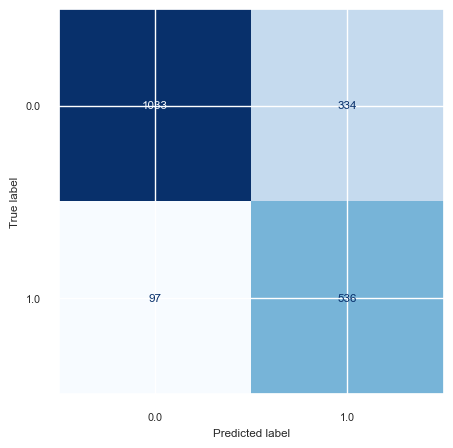

The TP rate is: 0.76
The TN rate is: 0.85
The FN rate is: 0.24
The FP rate is: 0.15


In [92]:
model = DecisionTreeClassifier(splitter='random')
fit_result(model, X_train_sm, y_train_sm, X_test, y_test)

#### 接著進行特徵挑選

<br>單一特徵排名 / 皮爾森相關係數<br>
特徵的一維排名利用的是一次只考慮單一特徵的排名算法，可以顯示每個特徵的相對排名

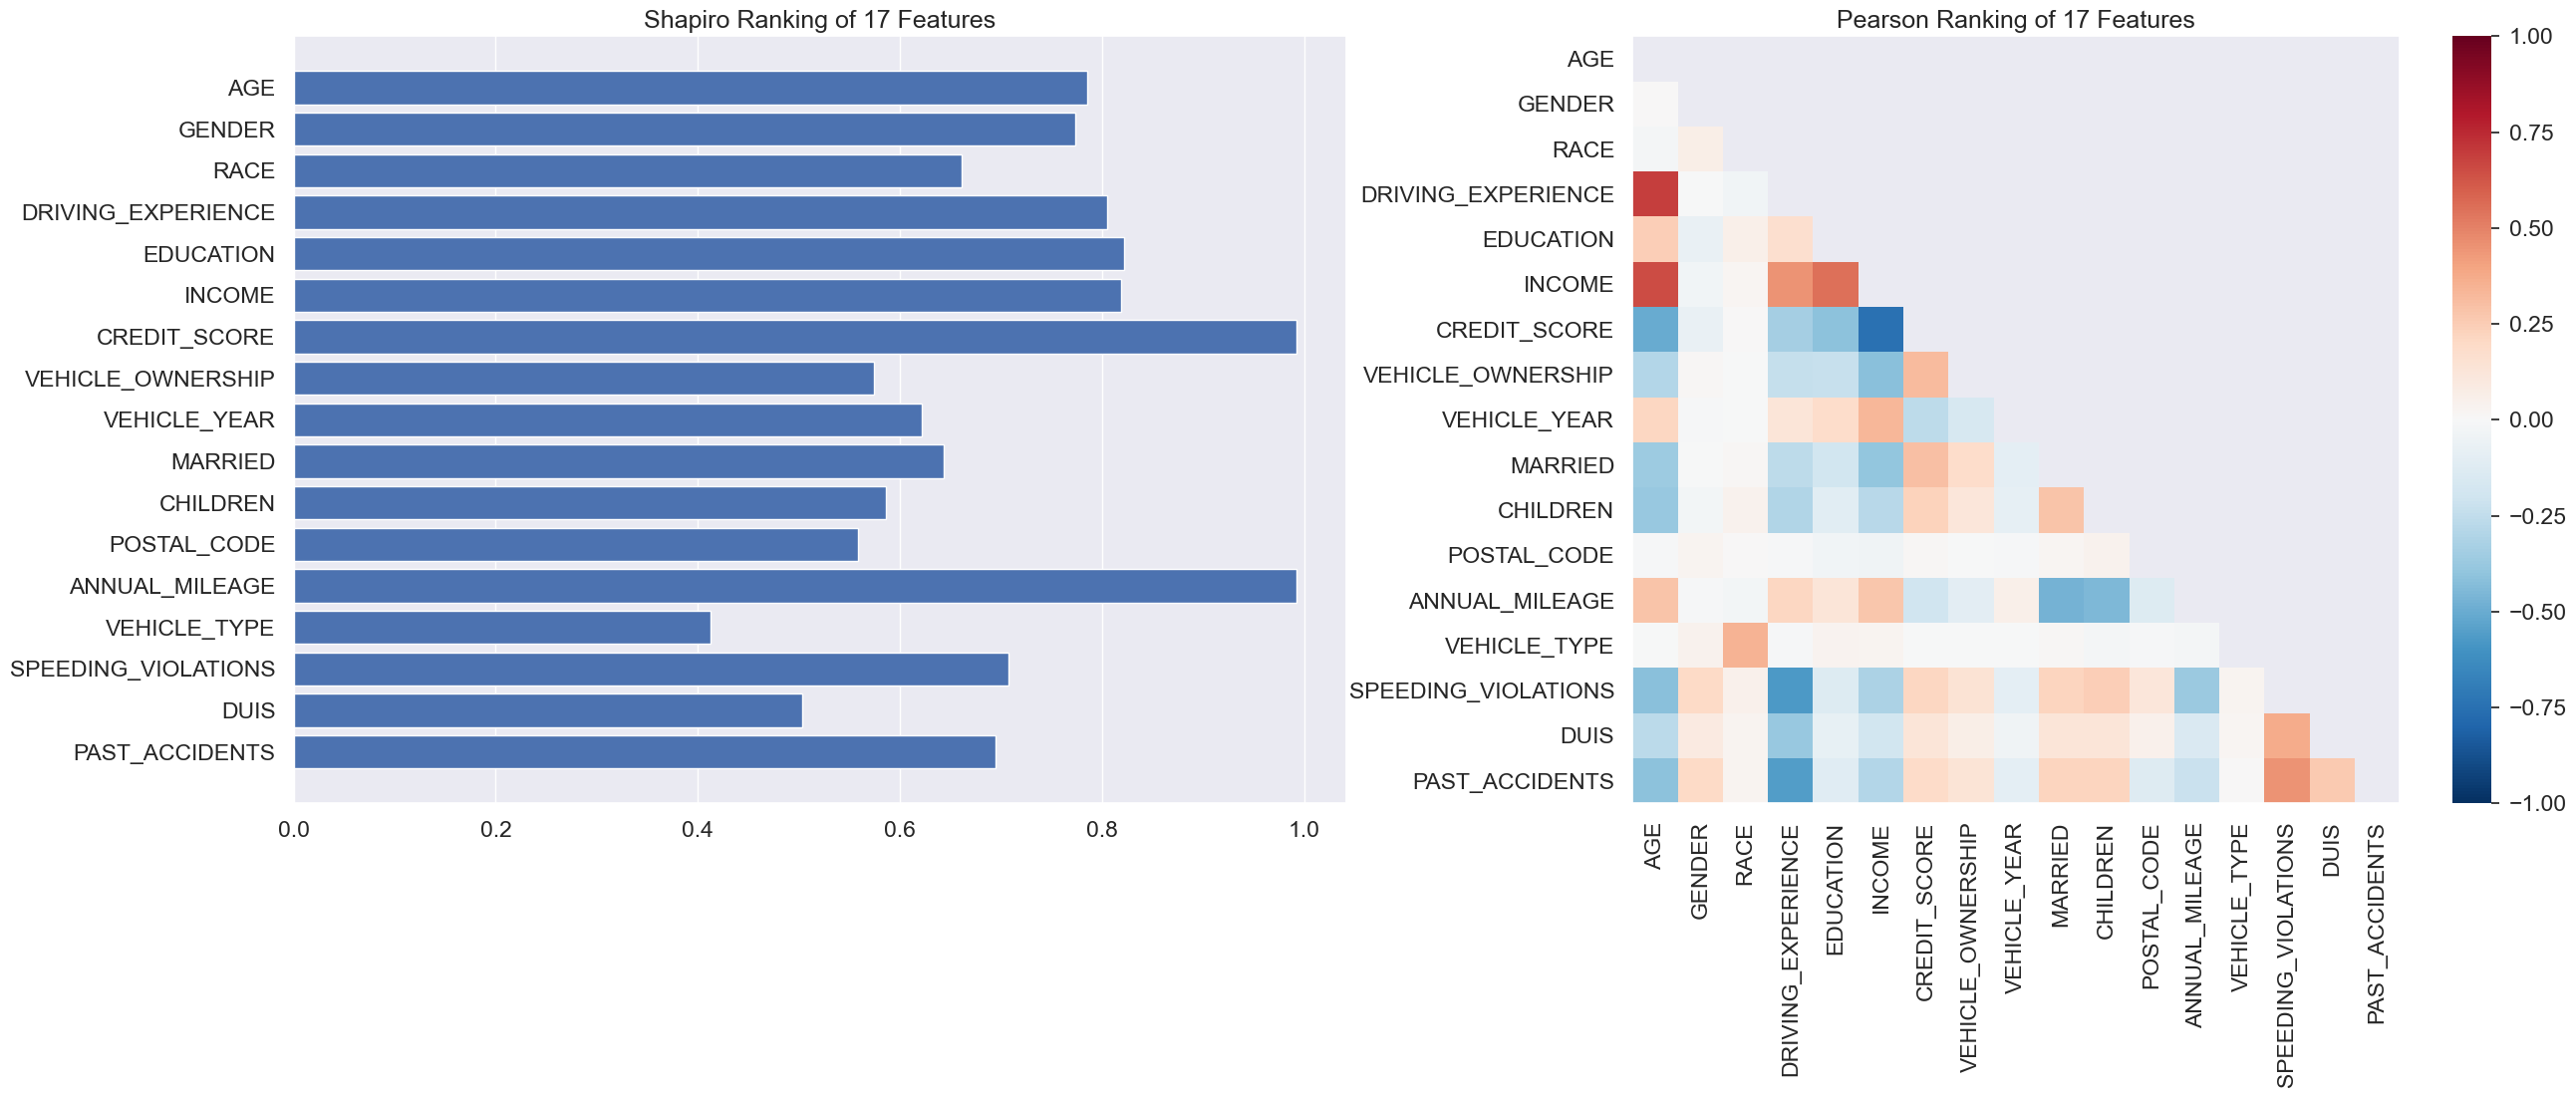

In [56]:
from yellowbrick.features import rank1d, rank2d

_, axes = plt.subplots(ncols=2, figsize=(30, 10))

rank1d(X_train_sm, ax=axes[0], show=False)
rank2d(X_train_sm, ax=axes[1], show=False)
plt.show()
sns.set(font_scale=1.2)

In [57]:
from collinearity import SelectNonCollinear  #消除共線性 這個方法可以使用在監督學習以及非監督式學習

In [58]:
def UNIP(x, y, threshold):
    selector = SelectNonCollinear(threshold)

    selector.fit(x.values, y.values)
    corr = selector.transform(x.values)

    mask = selector.get_support()

    new_feature = []
    for i in range(len(mask)):
        if mask[i] == True:
            new_feature.append(x.columns[i])

    display(new_feature)

    sns.set(font_scale=0.7)
    heatmap = sns.heatmap(round(x[new_feature].corr(), 2),
                          annot=False,
                          cmap="vlag",
                          vmax=1,
                          vmin=-1)
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)

    return new_feature

['GENDER',
 'RACE',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'VEHICLE_OWNERSHIP',
 'VEHICLE_YEAR',
 'MARRIED',
 'CHILDREN',
 'POSTAL_CODE',
 'ANNUAL_MILEAGE',
 'VEHICLE_TYPE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS']

After removing 2 features, there are 15 features left.


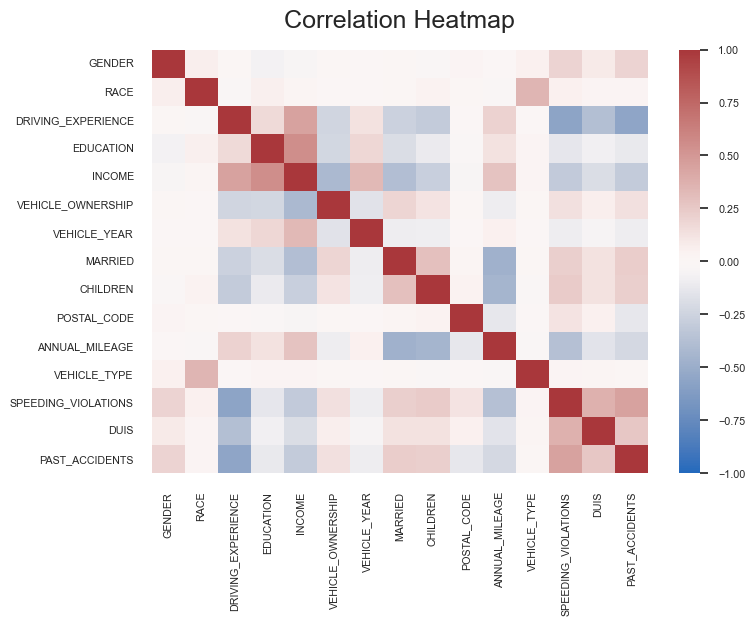

In [60]:
HT = UNIP(X_train_sm, y_train_sm, threshold=0.60) #印出選擇後特徵
print(f'After removing {X_train_sm.shape[1]-len(HT)} features, there are {len(HT)} features left.')

In [61]:
X_train_HT = X_train_sm[HT]
X_test_HT = X_test[HT]

#### 接著用Lasso進行壓縮

In [71]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.03, tol=1e-5)#alpha=0.015, tol=1e-1
model.fit(X_train_HT, y_train_sm)
predicted_y = model.predict(X_test_HT)
#model.coef_

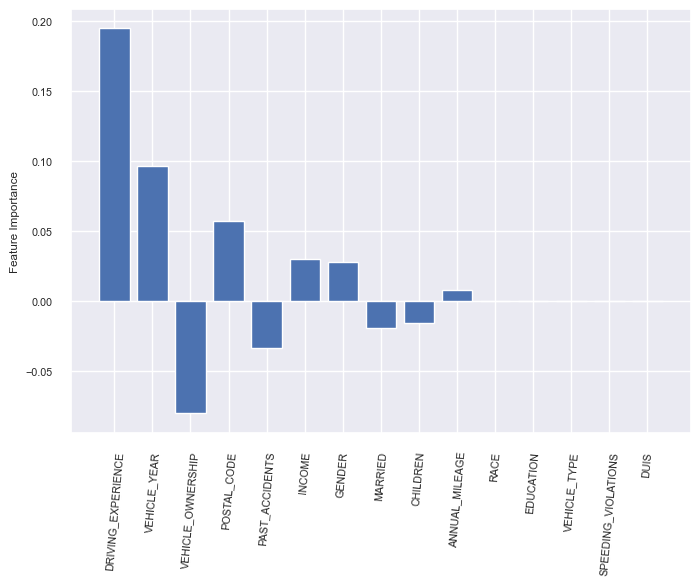

the last few features is almost 0, we can discard them.


In [72]:
importance = zip(model.coef_, X_train_HT.columns)
imp = list(importance)
imp.sort(key=lambda x: abs(x[0]), reverse=True) 
x_pos = np.arange(len(imp)) 
score = list(map(lambda x: x[0], imp))
name = list(map(lambda x: x[1], imp))

plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, name, rotation = 85) 
plt.ylabel('Feature Importance')
plt.show()
print('the last few features is almost 0, we can discard them.')

In [73]:
imp_feature = [x[1] for x in imp if abs(x[0])>0]
print(f"there are {len(imp_feature)} features left.")

there are 10 features left.


In [74]:
X_train_final = X_train_HT
X_test_final = X_test_HT
y_train_final = y_train_sm
y_test_final = y_test
X_train_final

,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,-1.066367,-0.233246,-1.138878,0.087149,-0.900274,0.661480,-1.526241,0.997004,0.677143,-0.511636,-1.335406,-0.130468,1.111686,-0.433018,2.940435
1,-0.977978,-1.880052,1.255789,-0.897356,-0.221616,0.661480,0.549875,0.997004,-1.476792,-0.511636,0.115346,-0.697216,-0.661338,-0.433018,-0.642457
2,-1.008799,-0.041609,-0.283032,0.062556,-0.867563,0.661480,-1.507686,0.997004,-1.476792,0.685773,-0.972718,0.025767,0.668430,-0.433018,-0.642457
3,-0.997351,-0.076759,-0.287644,0.057660,0.652674,0.661480,0.652179,0.997004,-1.476792,-0.511636,0.478034,0.033651,1.111686,-0.433018,-0.045309
4,-1.060039,-0.238720,-0.281967,1.645003,0.686483,0.661480,0.643959,-1.003005,0.677143,0.685773,-0.610030,-0.137445,-0.218082,-0.433018,-0.642457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7469,-1.051412,-0.107982,-0.288163,0.058827,1.709529,0.534425,0.641459,-1.003005,0.677143,0.685773,0.456830,-0.025299,0.251088,-0.433018,-0.642457
7470,0.971036,-0.227748,-0.317252,-0.928093,-0.177934,0.661480,0.634059,-1.003005,0.677143,-0.511636,0.170734,-0.086277,-0.320271,-0.433018,0.092360
7471,1.084839,-0.073121,-0.276891,0.085479,-0.877742,0.661480,0.654269,0.997004,-1.476792,-0.138522,-0.110682,0.009668,-0.661338,0.121389,-0.456385
7472,-1.075194,0.212617,-0.220223,-0.912150,-0.860815,0.661480,-1.537456,-1.003005,0.677143,0.685773,1.163654,0.252350,-0.661338,-0.433018,-0.642457


對於主要目標 標籤為1的預測
Precision：0.5903614457831325,             Recall：0.8515007898894155,
        Accuracy：0.766,        AUC：0.7889544915065219,        f1-score：0.6972833117723156
[[993 374]
 [ 94 539]]
              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      1367
         1.0       0.59      0.85      0.70       633

    accuracy                           0.77      2000
   macro avg       0.75      0.79      0.75      2000
weighted avg       0.81      0.77      0.77      2000



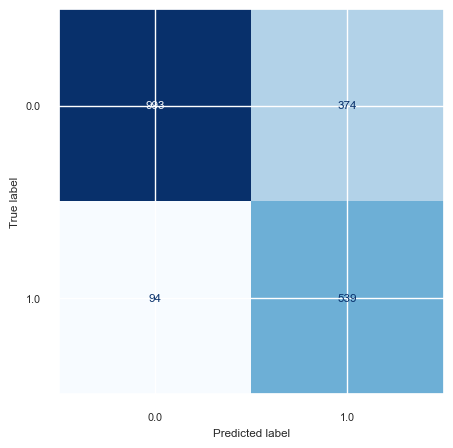

The TP rate is: 0.73
The TN rate is: 0.85
The FN rate is: 0.27
The FP rate is: 0.15


In [93]:
model = DecisionTreeClassifier(splitter='random')
fit_result(model, X_train_final, y_train_final, X_test_final, y_test_final)

### 特徵挑選完成，開始訓練模型

對於主要目標 標籤為1的預測
Precision：0.652122641509434,             Recall：0.8736176935229067,
        Accuracy：0.8125,        AUC：0.9072813127303363,        f1-score：0.7467927076299797
[[1072  295]
 [  80  553]]
              precision    recall  f1-score   support

         0.0       0.93      0.78      0.85      1367
         1.0       0.65      0.87      0.75       633

    accuracy                           0.81      2000
   macro avg       0.79      0.83      0.80      2000
weighted avg       0.84      0.81      0.82      2000



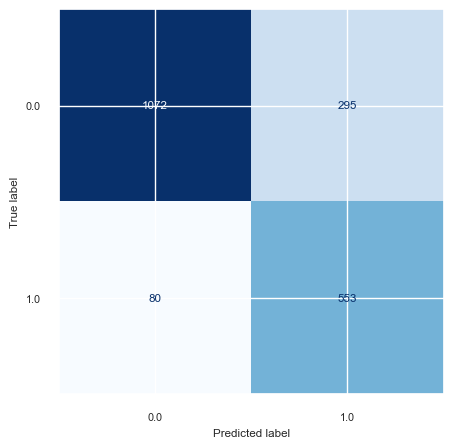

The TP rate is: 0.78
The TN rate is: 0.87
The FN rate is: 0.22
The FP rate is: 0.13


In [90]:
forest = RandomForestClassifier(random_state=42)
fit_result(forest, X_train_final, y_train_final, X_test_final, y_test_final)

### 使用CrossCV測試各種模型參數
<br>使用時長很大，小心執行。

In [78]:
#crossCV挑參數
#https://blog.csdn.net/weixin_41712499/article/details/82882542
#https://ithelp.ithome.com.tw/articles/10267379?sc=iThomeR
# n_estimators: 森林中樹木的數量，預設=100。
# max_features: 劃分時考慮的最大特徵數，預設auto。
# criterion: 亂度的評估標準，gini/entropy。預設為gini。
# max_depth: 樹的最大深度。
# splitter: 特徵劃分點選擇標準，best/random。預設為best。
# random_state: 亂數種子，確保每次訓練結果都一樣，splitter=random 才有用。
# min_samples_split: 至少有多少資料才能再分
# min_samples_leaf: 分完至少有多少資料才能分
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier(n_estimators=100, random_state= 42)

n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5,15, num=8)]
max_depth.append(None)
min_samples_split = [2, 3, 7, 13, 20, 50, 100]
min_samples_leaf = [5, 10, 20, 40, 80]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}
random_grid

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 6, 7, 9, 10, 12, 13, 15, None],
 'min_samples_split': [2, 3, 7, 13, 20, 50, 100],
 'min_samples_leaf': [5, 10, 20, 40, 80],
 'bootstrap': [True, False]}

In [79]:
rdforest = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator = rdforest, param_distributions=random_grid,
                              n_iter=10, cv=3, verbose=3, scoring='f1_macro', random_state=42)#, n_jobs=-1

rf_random.fit(X_train_final,y_train_final)
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=100;, score=0.895 total time=   0.6s
[CV 2/3] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=100;, score=0.900 total time=   0.6s
[CV 3/3] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=40, min_samples_split=100, n_estimators=100;, score=0.718 total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=20, min_samples_split=7, n_estimators=100;, score=0.893 total time=   0.4s
[CV 2/3] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=20, min_samples_split=7, n_estimators=100;, score=0.898 total time=   0.5s
[CV 3/3] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=20, min_samples_split=7, n_estimators=100;, score=0.720 total time=   0.4s
[CV 1/3] END

{'n_estimators': 944,
 'min_samples_split': 3,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 15,
 'bootstrap': False}

對於主要目標 標籤為1的預測
Precision：0.6468531468531469,             Recall：0.8767772511848341,
        Accuracy：0.8095,        AUC：0.909555061706138,        f1-score：0.7444668008048289
[[1064  303]
 [  78  555]]
              precision    recall  f1-score   support

         0.0       0.93      0.78      0.85      1367
         1.0       0.65      0.88      0.74       633

    accuracy                           0.81      2000
   macro avg       0.79      0.83      0.80      2000
weighted avg       0.84      0.81      0.82      2000



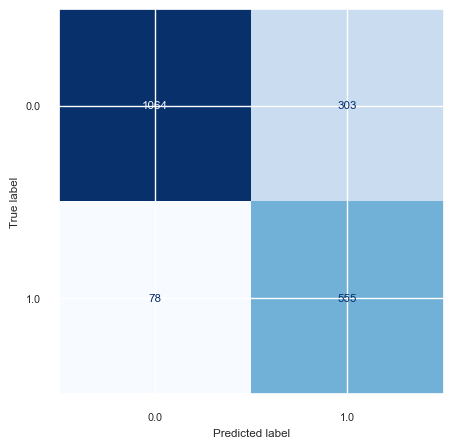

The TP rate is: 0.78
The TN rate is: 0.88
The FN rate is: 0.22
The FP rate is: 0.12


In [91]:
rdforest = RandomForestClassifier(**rf_random.best_params_, random_state=42)
fit_result(rdforest, X_train_final, y_train_final, X_test_final, y_test_final)

In [81]:
#adaboost
rf_random.best_params_

{'n_estimators': 944,
 'min_samples_split': 3,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 15,
 'bootstrap': False}

In [83]:
rdm_forest = RandomForestClassifier(**rf_random.best_params_, random_state=42)
rdm_forest.fit(X_train_final, y_train_final)
importances = rdm_forest.feature_importances_
importances

array([0.036954  , 0.01219248, 0.25353688, 0.01722654, 0.093809  ,
       0.08472097, 0.10665125, 0.02216644, 0.01628009, 0.10180934,
       0.02682982, 0.011379  , 0.08636108, 0.01140106, 0.11868205])

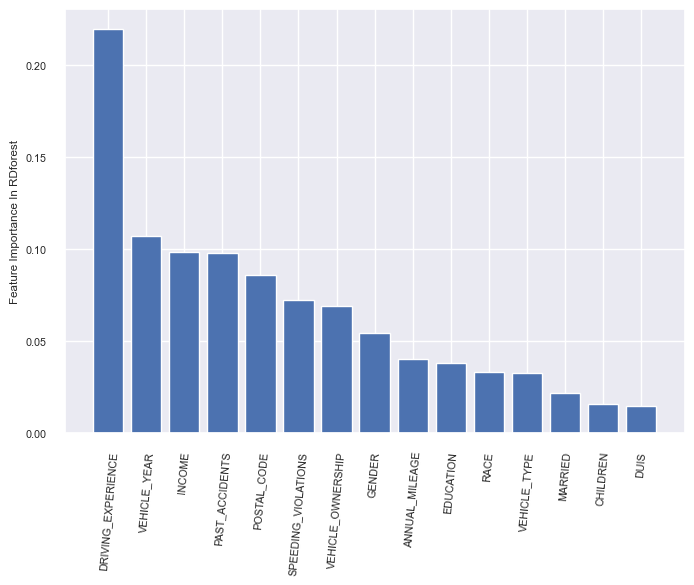

<Figure size 200x200 with 0 Axes>

In [86]:
#plt.figure(figsize=(10,10))
rdm_forest = RandomForestClassifier(n_estimators=944, random_state=42)
rdm_forest.fit(X_train_final, y_train_final)
importances = rdm_forest.feature_importances_
importanceRD = zip(importances, X_train_final.columns)
imp = list(importanceRD)
imp.sort(key=lambda x: abs(x[0]), reverse=True) 
x_pos = np.arange(len(imp)) 
score = list(map(lambda x: x[0], imp))
name = list(map(lambda x: x[1], imp))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, name, rotation = 85) 
plt.ylabel('Feature Importance In RDforest')
plt.figure(figsize=(2,2))
plt.show()

## 主成分分析PCA+Ont hot encoding

Text(0, 0.5, 'Cumulative explained variance')

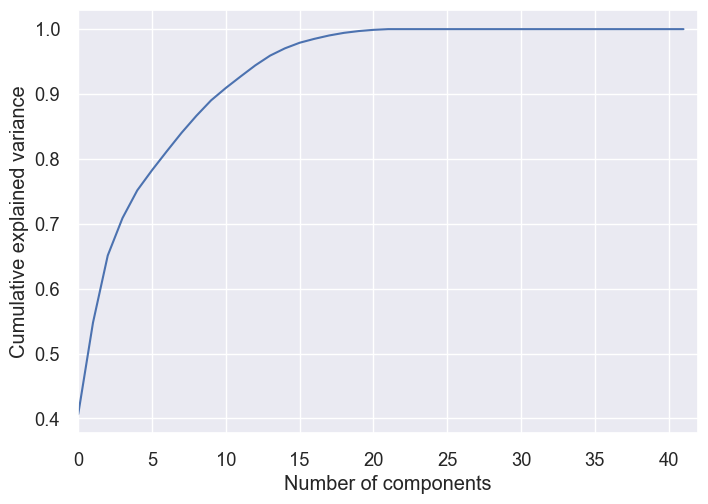

In [320]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
pca = PCA(n_components=np.shape(X_train)[1]).fit(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, np.shape(X_train)[1], 1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')